In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_breast_cancer(return_X_y=True)

In [3]:
trainX, testX, trainY, testY = train_test_split(X, y, random_state=42, test_size=0.2)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(455, 30) (455,) (114, 30) (114,)


In [4]:
print(testY)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


## Stacking

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [6]:
clsfrs = [
    ('dtr', DecisionTreeClassifier(random_state=42)),
    ('prc', Perceptron(random_state=42)),
    ('svm', LinearSVC(random_state=42)),
]

In [7]:
st = StackingClassifier(estimators=clsfrs, final_estimator=LogisticRegression(random_state=42), n_jobs=-1)
st.fit(trainX, trainY)
print('Stacking (dtr, prc, svm) score:', st.score(testX, testY))

Stacking (dtr, prc, svm) score: 0.868421052631579


In [8]:
clsfrs = [
    ('svm1', LinearSVC(random_state=421)),
    ('svm2', LinearSVC(random_state=422)),
    ('svm3', LinearSVC(random_state=423)),
]
st = StackingClassifier(estimators=clsfrs, final_estimator=LogisticRegression(random_state=42), n_jobs=-1)
st.fit(trainX, trainY)
print('Stacking (svm1, svm2, svm3) score:', st.score(testX, testY))

Stacking (svm1, svm2, svm3) score: 0.9298245614035088


In [9]:
clsfrs = [
    ('dtr1', DecisionTreeClassifier(random_state=421)),
    ('dtr2', DecisionTreeClassifier(random_state=422)),
    ('dtr3', DecisionTreeClassifier(random_state=423)),
]
st = StackingClassifier(estimators=clsfrs, final_estimator=LogisticRegression(random_state=42), n_jobs=-1)
st.fit(trainX, trainY)
print('Stacking (dtr1, dtr2, dtr3) score:', st.score(testX, testY))

Stacking (dtr1, dtr2, dtr3) score: 0.9385964912280702


In [10]:
clsfrs = [
    ('prc1', Perceptron(random_state=421)),
    ('prc2', Perceptron(random_state=422)),
    ('prc3', Perceptron(random_state=423)),
]
st = StackingClassifier(estimators=clsfrs, final_estimator=LogisticRegression(random_state=42), n_jobs=-1)
st.fit(trainX, trainY)
print('Stacking (prc1, prc2, prc3) score:', st.score(testX, testY))

Stacking (prc1, prc2, prc3) score: 0.9473684210526315


## Bagging

In [11]:
from sklearn.ensemble import BaggingClassifier

In [12]:
bg = BaggingClassifier(base_estimator=None, n_estimators=2, n_jobs=-1, random_state=42)
bg.fit(trainX, trainY)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=2, n_jobs=-1,
                  oob_score=False, random_state=42, verbose=0,
                  warm_start=False)

In [13]:
out_y = bg.predict(testX) # предсказываем классы
print(out_y)
out_score = bg.score(testX, testY) # считаем качество классификации
print('Bagging (2 tree) score:', out_score)

[1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0
 1 0 0]
Bagging (2 tree) score: 0.9385964912280702


In [14]:
bg = BaggingClassifier(base_estimator=None, n_estimators=10, n_jobs=-1, random_state=42).fit(trainX, trainY)
print('Bagging (10 tree) score:', bg.score(testX, testY))

Bagging (10 tree) score: 0.956140350877193


In [15]:
bg = BaggingClassifier(base_estimator=None, n_estimators=100, n_jobs=-1, random_state=42).fit(trainX, trainY)
print('Bagging (100 tree) score:', bg.score(testX, testY))

Bagging (100 tree) score: 0.956140350877193


In [16]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=42)

In [17]:
bg = BaggingClassifier(base_estimator=clf, n_estimators=10, n_jobs=-1, random_state=42).fit(trainX, trainY)
print('Bagging (10 svm) score:', bg.score(testX, testY))

Bagging (10 svm) score: 0.9385964912280702


In [18]:
bg = BaggingClassifier(base_estimator=clf, n_estimators=100, n_jobs=-1, random_state=42).fit(trainX, trainY)
print('Bagging (100 svm) score:', bg.score(testX, testY))

Bagging (100 svm) score: 0.9385964912280702


## AdaBoost

In [19]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
ada = AdaBoostClassifier(base_estimator=None, n_estimators=10, random_state=42).fit(trainX, trainY)
print('AdaBoost (10 tree) score:', ada.score(testX, testY))

AdaBoost (10 tree) score: 0.9824561403508771


Text(0, 0.5, 'Accuracy')

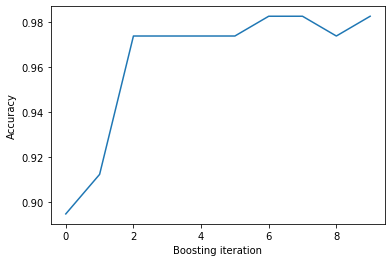

In [21]:
s_hist = list(ada.staged_score(testX, testY)) # посмотрим на историю обучения
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.plot(s_hist)
plt.xlabel('Boosting iteration')
plt.ylabel('Accuracy')

In [22]:
ada = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=42).fit(trainX, trainY)
print('AdaBoost (100 tree) score:', ada.score(testX, testY))
print("Overfit!")

AdaBoost (100 tree) score: 0.9736842105263158
Overfit!


In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, solver='liblinear')

In [24]:
ada = AdaBoostClassifier(base_estimator=clf, n_estimators=10, random_state=42).fit(trainX, trainY)
print('AdaBoost (10 logr) score:', ada.score(testX, testY))

AdaBoost (10 logr) score: 0.956140350877193


In [25]:
ada = AdaBoostClassifier(base_estimator=clf, n_estimators=100, random_state=42).fit(trainX, trainY)
print('AdaBoost (100 logr) score:', ada.score(testX, testY))

AdaBoost (100 logr) score: 0.9649122807017544


In [26]:
ada = AdaBoostClassifier(base_estimator=clf, n_estimators=1000, random_state=42).fit(trainX, trainY)
print('AdaBoost (1000 logr) score:', ada.score(testX, testY))

AdaBoost (1000 logr) score: 0.9649122807017544


## Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=10, random_state=42).fit(trainX, trainY)
print('Gradient Boosting (10 tree) score:', gb.score(testX, testY))

Gradient Boosting (10 tree) score: 0.956140350877193


In [29]:
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=42).fit(trainX, trainY)
print('Gradient Boosting (100 tree) score:', gb.score(testX, testY))

Gradient Boosting (100 tree) score: 0.956140350877193


## XGBoost

In [30]:
!pip install xgboost

In [31]:
from xgboost import XGBClassifier

In [32]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=10, n_jobs=-1, random_state=42).fit(trainX, trainY)
print('XGB (10 tree) score:', xgb.score(testX, testY))

XGB (10 tree) score: 0.956140350877193


In [33]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, n_jobs=-1, random_state=42).fit(trainX, trainY)
print('XGB (100 tree) score:', xgb.score(testX, testY))

XGB (100 tree) score: 0.9649122807017544


In [34]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=1000, n_jobs=-1, random_state=42).fit(trainX, trainY)
print('XGB (1000 tree) score:', xgb.score(testX, testY))

XGB (1000 tree) score: 0.9649122807017544


## LightGBM

In [35]:
!pip install lightgbm

In [36]:
from lightgbm import LGBMClassifier

In [37]:
xgb = LGBMClassifier(learning_rate=0.1, n_estimators=10, n_jobs=-1, random_state=42).fit(trainX, trainY)
print('LGB (10 tree) score:', xgb.score(testX, testY))

LGB (10 tree) score: 0.9649122807017544


In [38]:
xgb = LGBMClassifier(learning_rate=0.1, n_estimators=100, n_jobs=-1, random_state=42).fit(trainX, trainY)
print('LGB (100 tree) score:', xgb.score(testX, testY))

LGB (100 tree) score: 0.9736842105263158


In [39]:
xgb = LGBMClassifier(learning_rate=0.1, n_estimators=1000, n_jobs=-1, random_state=42).fit(trainX, trainY)
print('LGB (1000 tree) score:', xgb.score(testX, testY))

LGB (1000 tree) score: 0.9736842105263158


## CatBoost

In [40]:
!pip install catboost

In [41]:
from catboost import CatBoostClassifier

In [42]:
cb = CatBoostClassifier(learning_rate=0.1, n_estimators=10, thread_count=-1, random_state=42, logging_level='Silent').fit(trainX, trainY)
print('CB (10 tree) score:', cb.score(testX, testY))

CB (10 tree) score: 0.9736842105263158


In [43]:
cb = CatBoostClassifier(learning_rate=0.1, n_estimators=100, thread_count=-1, random_state=42, logging_level='Silent').fit(trainX, trainY)
print('CB (100 tree) score:', cb.score(testX, testY))

CB (100 tree) score: 0.9649122807017544
